writing to excel completed...Generating the Histogram..


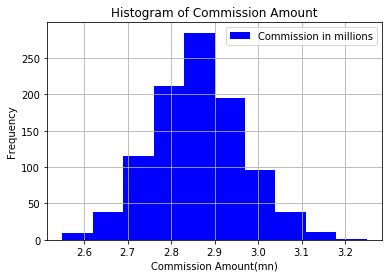

Generating the Histogram completed.....


'\n#plot the Histogram\n# Generate data on commute times.\nsize, scale = 1000, 10\ncommutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)\n\npd.Series()\ncommutes.plot.hist(grid=True, bins=20, rwidth=0.9,color=\'#607c8e\')\nplt.title(\'Commute Times for 1,000 Commuters\')\nplt.xlabel(\'Counts\')\nplt.ylabel(\'Commute Time\')\nplt.grid(axis=\'y\', alpha=0.75)\n\n# An "interface" to matplotlib.axes.Axes.hist() method\nn, bins, patches = plt.hist(x=d, bins=\'auto\', color=\'#0504aa\',alpha=0.7, rwidth=0.85)\nplt.grid(axis=\'y\', alpha=0.75)\nplt.xlabel(\'Value\')\nplt.ylabel(\'Frequency\')\nplt.title(\'My Very Own Histogram\')\nplt.text(23, 45, r\'$\\mu=15, b=3$\')\nmaxfreq = n.max()\n# Set a clean upper y-axis limit.\nplt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)\n\nx = [1,2,3,4,5,6,7,8,9,10,21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]\nnum_bins = 5\nn, bins, patches = plt.hist(x, num_bins range=[1,10] facecolor=\'green\', alpha=0.8)\n

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#set the mean & std dev from prehistorical data
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

#Now we can use numpy to generate a list of percentages that will replicate our historical normal distribution:
#pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

#print(pct_to_target[:10])


'''
This distribution shows us that sales targets are set into 1 of 6 buckets and the frequency gets lower as the amount increases.
This distribution could be indicative of a very simple target setting process where individuals are bucketed into certain groups
and given targets consistently based on their tenure, territory size or sales pipeline.
For the sake of this example, we will use a uniform distribution but assign lower probability rates for some of the values.

Here is how we can build this using numpy.random.choice
'''
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

'''
Now that we know how to create our two input distributions, let’s build up a pandas dataframe:
'''
#df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
#                                               'Sales_Target': sales_target})

'''
You might notice that I did a little trick to calculate the actual sales amount. For this problem, 
the actual sales amount may change greatly over the years but the performance distribution remains remarkably consistent. 
Therefore, I’m using the random distributions to generate my inputs and backing into the actual sales.
'''

#df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']


#print(df)
'''
The final piece of code we need to create is a way to map our Pct_To_Target to the commission rate. Here is the function
'''
def calc_commission_rate(x):
    """ 
    Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

'''
The added benefit of using python instead of Excel is that we can create much more complex logic that is easier to 
understand than if we tried to build a complex nested if statement in Excel.

Now we create our commission rate and multiply it times sales:
'''

#df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
#df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

#print(df)

'''
Let’s Loop
The real “magic” of the Monte Carlo simulation is that if we run a simulation many times, we start to develop a picture of the 
likely distribution of results. In Excel, you would need VBA or another plugin to run multiple iterations. In python, we can use
a for loop to run as many simulations as we’d like.

In addition to running each simulation, we save the results we care about in a list that we will turn into a dataframe for 
further analysis of the distribution of results.

Here is the full for loop code:
'''


all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    #print(sales_target)
    #print(pct_to_target)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    #print(df)
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),df['Commission_Amount'].sum().round(0), df['Sales_Target'].sum().round(0)]) 
    
    
    #print(all_stats)

    
'''While this may seem a little intimidating at first, we are only including 7 python statements inside this loop that we can 
run as many times as we want. On my standard laptop, I can run 1000 simulations in 2.75s so there is no reason I can’t do this 
many more times if need be.

At some point, there are diminishing returns. The results of 1 Million simulations are not necessarily any more useful than 
10,000. My advice is to try different amounts and see how the output changes.

In order to analyze the results of the simulation, I will build a dataframe from all_stats :
'''
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales','Commission_Amount','Sales_Target'])
#Now, it is easy to see what the range of results look like:

#results_df.describe().style.format('{:,}')

# Store the data of dataframe into excel.
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('monte_carlo_data.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sheetname = 'ModelData' 
results_df.to_excel(writer, sheet_name = sheetname)

# Close the Pandas Excel writer and output the Excel file.
writer.save()
print("writing to excel completed...Generating the Histogram..")

#plot the Histogram

#d = pd.read_csv('runs.csv')
#score_india = d['score_india']
#plt.hist([score_pk_india, score_pk], color=['blue', 'green'])

legend = ['Commission in millions']
comms_data =(results_df['Commission_Amount']/1000000).round(2)
plt.hist([comms_data], rwidth = 0.8,histtype='stepfilled', orientation='vertical',color=['blue'],label='None')
plt.xlabel("Commission Amount(mn)")
plt.ylabel("Frequency")
plt.legend(legend)
#plt.xticks(range(0, 7))
#plt.yticks(range(1, 20))
plt.title('Histogram of Commission Amount')
plt.grid(True)
plt.show()

print("Generating the Histogram completed.....")

'''
#plot the Histogram
# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

pd.Series()
commutes.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

x = [1,2,3,4,5,6,7,8,9,10,21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins range=[1,10] facecolor='green', alpha=0.8)
plt.show()
plt.hist()

'''

